# 1 Preprocessing
Read the description of the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes) dataset. Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), load the dataset into a `DataFrame` from the URL https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt.

In [12]:
import pandas as pd

# sep='\t' indicates that tab is the character separating values.
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

We will analyze the data for individuals in their twenties with `SEX == 1`. Store this subset of data, dropping `AGE` and `SEX.` Store the response variable. Store the other variables besides `SEX` and `AGE` as predictors.

In [14]:
sub = df[(df["AGE"] >= 20) & (df["AGE"] < 30) & (df["SEX"] == 1)].drop(columns=["AGE", "SEX"])
y = sub["Y"]
X = sub.drop(columns="Y")


In [15]:
print(sub)

      BMI     BP   S1     S2    S3    S4      S5  S6    Y
3    25.3  84.00  198  131.4  40.0  5.00  4.8903  89  206
5    22.6  89.00  139   64.8  61.0  2.00  4.1897  68   97
9    30.0  85.00  180   93.4  43.0  4.00  5.3845  88  310
10   18.6  97.00  114   57.6  46.0  2.00  3.9512  83  101
22   26.0  92.00  187  120.4  56.0  3.00  3.9703  88   68
41   20.1  63.00  135   69.0  54.0  3.00  4.0943  89   55
47   19.6  78.00  128   68.0  43.0  3.00  4.4427  71  142
60   26.0  83.00  141   65.2  64.0  2.00  4.0775  83   61
77   23.0  73.00  161   97.8  54.0  3.00  3.8286  91  200
79   22.9  87.00  191  128.2  53.0  4.00  3.8918  85  113
94   24.8  91.00  189  106.8  69.0  3.00  4.1897  69   90
95   21.0  71.00  156   97.0  38.0  4.00  4.6540  90  162
102  29.0  90.00  216  131.4  65.0  3.00  4.5850  91  302
106  19.3  82.00  156   93.2  52.0  3.00  3.9890  71  134
112  28.3  87.00  193  128.0  49.0  4.00  4.3820  92  246
126  20.7  87.00  149   80.6  61.0  2.00  3.6109  78   99
131  19.9  75.

In [3]:
print(y)

3      206
5       97
9      310
10     101
22      68
41      55
47     142
60      61
77     200
79     113
94      90
95     162
102    302
106    134
112    246
126     99
131    158
134    103
136     85
219    185
223    150
247     51
293    200
312    144
373    168
393     69
425    152
Name: Y, dtype: int64


In [4]:
print(X)

      BMI     BP   S1     S2    S3    S4      S5  S6
3    25.3  84.00  198  131.4  40.0  5.00  4.8903  89
5    22.6  89.00  139   64.8  61.0  2.00  4.1897  68
9    30.0  85.00  180   93.4  43.0  4.00  5.3845  88
10   18.6  97.00  114   57.6  46.0  2.00  3.9512  83
22   26.0  92.00  187  120.4  56.0  3.00  3.9703  88
41   20.1  63.00  135   69.0  54.0  3.00  4.0943  89
47   19.6  78.00  128   68.0  43.0  3.00  4.4427  71
60   26.0  83.00  141   65.2  64.0  2.00  4.0775  83
77   23.0  73.00  161   97.8  54.0  3.00  3.8286  91
79   22.9  87.00  191  128.2  53.0  4.00  3.8918  85
94   24.8  91.00  189  106.8  69.0  3.00  4.1897  69
95   21.0  71.00  156   97.0  38.0  4.00  4.6540  90
102  29.0  90.00  216  131.4  65.0  3.00  4.5850  91
106  19.3  82.00  156   93.2  52.0  3.00  3.9890  71
112  28.3  87.00  193  128.0  49.0  4.00  4.3820  92
126  20.7  87.00  149   80.6  61.0  2.00  3.6109  78
131  19.9  75.00  175  108.6  54.0  3.00  4.1271  72
134  30.4  85.00  198  115.6  67.0  3.00  4.34

# 2 Exploratory Data Analysis
Calculate the correlation matrix of the `DataFrame` containing both predictors and response using the formula. Verify your results against the `pandas` correlation matrix.

In [5]:
import numpy as np

# Manual.
# Note that this code involves manipulating pandas objects like ndarrays.
# Covariance matrix.
cov_mat = (sub - sub.mean()).T @ (sub - sub.mean()) / (sub.shape[0] - 1)
# Normalize for correlation matrix.
cor_mat = cov_mat / np.outer(sub.std(), sub.std()) 
display(cor_mat)

# pandas
display(sub.corr())

,BMI,BP,S1,S2,S3,S4,S5,S6,Y
BMI,1.000000,0.448135,0.608352,0.562394,0.014054,0.436783,0.299015,0.454860,0.523398
BP,0.448135,1.000000,0.343863,0.349033,0.103557,0.051476,-0.080894,0.055317,0.132195
S1,0.608352,0.343863,1.000000,0.951861,0.192640,0.634086,0.218626,0.214832,0.345817
S2,0.562394,0.349033,0.951861,1.000000,-0.008623,0.723020,0.090848,0.314900,0.342952
S3,0.014054,0.103557,0.192640,-0.008623,1.000000,-0.553591,-0.361040,-0.397288,-0.433763
S4,0.436783,0.051476,0.634086,0.723020,-0.553591,1.000000,0.505724,0.416971,0.514410
S5,0.299015,-0.080894,0.218626,0.090848,-0.361040,0.505724,1.000000,0.113503,0.581422
S6,0.454860,0.055317,0.214832,0.314900,-0.397288,0.416971,0.113503,1.000000,0.440562
Y,0.523398,0.132195,0.345817,0.342952,-0.433763,0.514410,0.581422,0.440562,1.000000


,BMI,BP,S1,S2,S3,S4,S5,S6,Y
BMI,1.000000,0.448135,0.608352,0.562394,0.014054,0.436783,0.299015,0.454860,0.523398
BP,0.448135,1.000000,0.343863,0.349033,0.103557,0.051476,-0.080894,0.055317,0.132195
S1,0.608352,0.343863,1.000000,0.951861,0.192640,0.634086,0.218626,0.214832,0.345817
S2,0.562394,0.349033,0.951861,1.000000,-0.008623,0.723020,0.090848,0.314900,0.342952
S3,0.014054,0.103557,0.192640,-0.008623,1.000000,-0.553591,-0.361040,-0.397288,-0.433763
S4,0.436783,0.051476,0.634086,0.723020,-0.553591,1.000000,0.505724,0.416971,0.514410
S5,0.299015,-0.080894,0.218626,0.090848,-0.361040,0.505724,1.000000,0.113503,0.581422
S6,0.454860,0.055317,0.214832,0.314900,-0.397288,0.416971,0.113503,1.000000,0.440562
Y,0.523398,0.132195,0.345817,0.342952,-0.433763,0.514410,0.581422,0.440562,1.000000


Explore scatterplots of individual predictors versus the response variable. Consider the relation between the scatterplots and the correlation coefficients. Consider whether the correlation coefficients accurately represent a linear relation between the response and predictors.

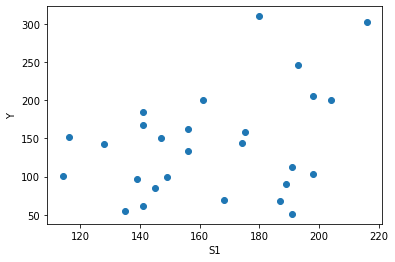

0.3458173364649732


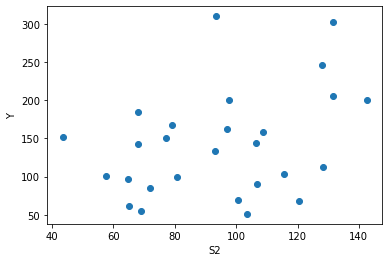

0.3429516037123322


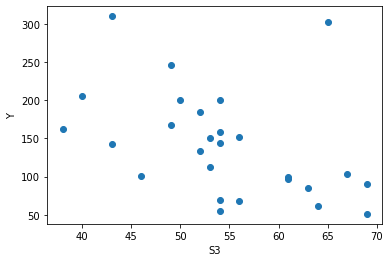

-0.43376295574234347


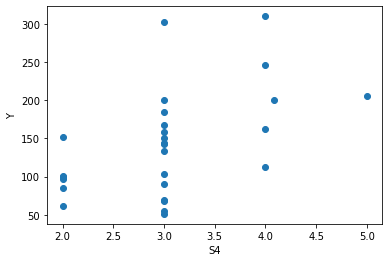

0.5144095090198727


In [16]:
import matplotlib.pyplot as plt

# Alter variable to see different relations.
# Note that a linear relation for S4 and Y is unclear.
var = "S1"
plt.figure()
plt.scatter(sub[var], sub["Y"])
plt.xlabel(var)
plt.ylabel("Y")
plt.show()
print(cor_mat["Y"][var])

var = "S2"
plt.figure()
plt.scatter(sub[var], sub["Y"])
plt.xlabel(var)
plt.ylabel("Y")
plt.show()
print(cor_mat["Y"][var])

var = "S3"
plt.figure()
plt.scatter(sub[var], sub["Y"])
plt.xlabel(var)
plt.ylabel("Y")
plt.show()
print(cor_mat["Y"][var])

var = "S4"
plt.figure()
plt.scatter(sub[var], sub["Y"])
plt.xlabel(var)
plt.ylabel("Y")
plt.show()
print(cor_mat["Y"][var])



# 3 Regression
Manually regress the response on the predictors using the least squares formula. Compare your coefficients to those from `sklearn.linear_model.LinearRegression`.

In [7]:
# Alter to select different predictors.
mask = ["BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]

# Augment X for intercept term.
aug_X = np.hstack((np.ones([X.shape[0], 1]), X[mask].values))

# Calculating with formula.
Xpinv = np.linalg.inv(aug_X.T @ aug_X) @ aug_X.T 
bHat = Xpinv @ y
yHat = aug_X @ bHat
display(bHat)

# Calculating with sklearn.
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X[mask], y)
display(np.append(reg.intercept_, reg.coef_))

array([ 93.55411879,   5.055731  ,  -0.84103224,   3.97816112,
        -2.25884765,  -8.57118782, -66.73791512,  36.11900347,
         0.90647686])

array([ 93.55411879,   5.055731  ,  -0.84103224,   3.97816112,
        -2.25884765,  -8.57118782, -66.73791512,  36.11900347,
         0.90647686])

# 4 Model Diagnostics

Calculate the mean-squared error of the model using the formula.

In [8]:
print("MSE:", np.mean((y - yHat)**2))

MSE: 1683.2925149521814


Draw a histogram of the _residuals_ $y_{i} - \hat{y}_{i}$. Draw a _fitted ($\hat{y}$) vs. residual_ plot. Consider what these indicate about the model fit.

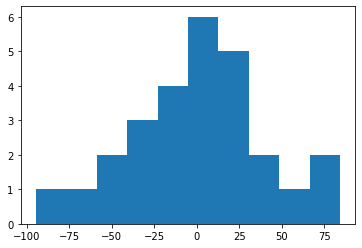

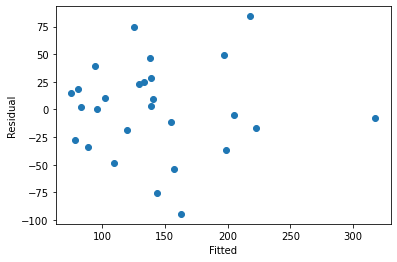

In [9]:
plt.hist(y - yHat)
plt.show()

plt.scatter(yHat, y - yHat)
plt.xlabel("Fitted")
plt.ylabel("Residual")
plt.show()

# Skew in the histogram indicates the model tends to underpredict.
# This tendency can be seen in the fitted versus residual plot as well.